# 🎀 1. 회귀분석

## 1-1 ) 단순 회귀분석
$ Y = aX + b $  
독립변수X가 종속변수Y에 영향을 준다면 두 변수 사이에 선형 관계가 있다고 한다.  
선형관계를 알고있다면 새로운 X가 주어졌을 때 Y값을 예측할 수 있다.  
두 변수 사이에 1:1로 대응되는 통계적 상관성을 갖는 알고리즘을 단순회귀분석(Simple Linear Regression)이라고 한다.  
==> 대표적인 지도학습 유형이다.

In [2]:
# 1. 데이터셋 준비
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
# 2. EDA
df.info()
print('\n')
print(df.describe())  # horsepower 열이 포함되어 출력되지 않는다. (object -> int로 타입을 변경해줄 필요가 있다.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


              mpg   cylinders  displacement       weight  acceleration   
count  398.000000  398.000000    398.000000   398.000000    398.000000  \
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      

In [4]:
# type(horsepower) object to int
# horsepower 열의 고유값 중 누락 데이터를 뜻하는 '?' 문자가 있는 행을 찾아 제거하고, 타입을 실수형으로 변환한다.

df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

print(df.describe())                                     # 데이터 통계 요약정보 확인
print('\n')

              mpg   cylinders  displacement  horsepower       weight   
count  392.000000  392.000000    392.000000  392.000000   392.000000  \
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.0000

In [5]:
# 3. 속성 선택
# 회귀분석에 변수로 사용할 후보 열을 선택한다.
# X = 'cylinders','horsepower','weight'
# Y = 'mpg'
ndf = df[['mpg','cylinders','horsepower','weight']]
print(ndf.head())

    mpg  cylinders  horsepower  weight
0  18.0          8       130.0  3504.0
1  15.0          8       165.0  3693.0
2  18.0          8       150.0  3436.0
3  16.0          8       150.0  3433.0
4  17.0          8       140.0  3449.0


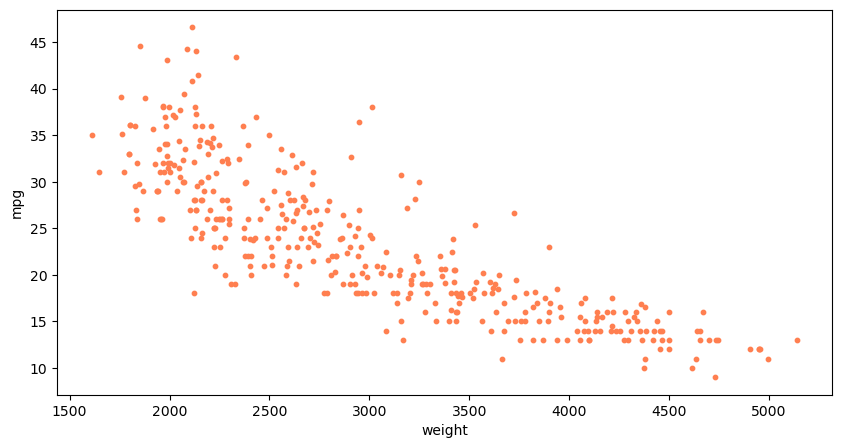

In [6]:
# 3개의 후보 중 단순 회귀분석에 사용할 독립변수X를 선택한다. X와 Y간의 1:1 관계를 찾는 것이므로 두 변수 간에 선형관계가 있는지 그래프를 그려서 확인한다.
# 1) Matplotlib의 plot()에 kind='scatter'옵션을 적용하여 산점도를 그린다.
# 2) x축 데이터로 'weight'열을 지정하고, y축 데이터로 'mpg'열을 지정하여 두 변수 간 상관성을 살펴보자.

ndf.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10,5))
plt.show()
plt.close()

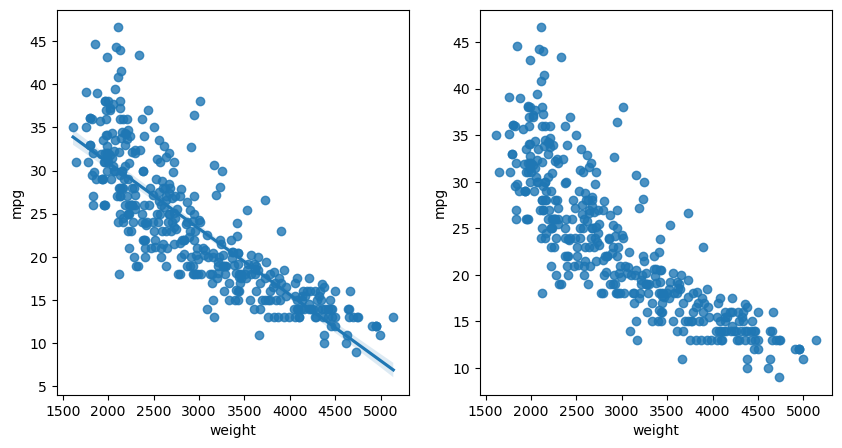

In [7]:
# 3) seaborn 라이브러리의 regplot()를 이용하여 두 변수에 대한 산점도를 그린다. 
# (기본적으로 회귀선을 표시하며 회귀선을 제거하려면 fit_reg=False 옵션을 적용한다.)

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1)  # 회귀선 표시
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False) # 회귀선 미표시
plt.show()
plt.close()

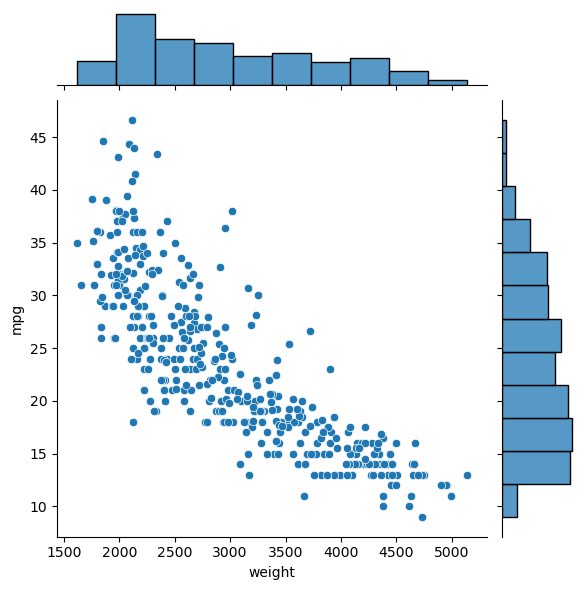

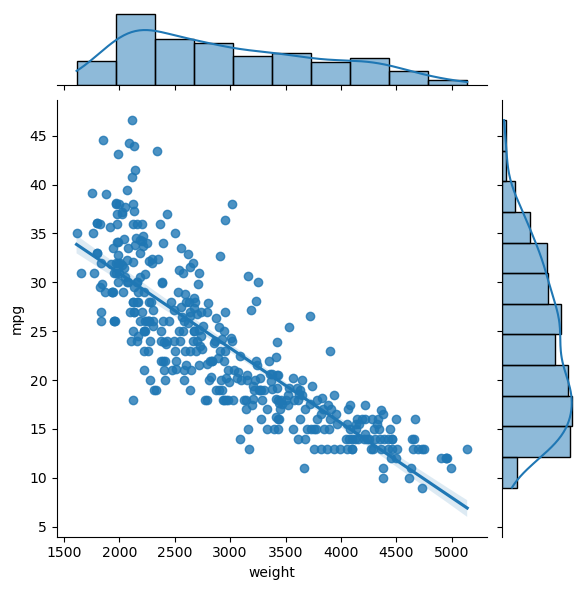

In [8]:
# 4) 산점도를 그릴 때 seaborn라이브러리의 jointplot()를 이용할 수도 있다. 두 변수의 히스토그램이 x,y 축에 별도로 표시되는 특징이 있다.
# ( kind='reg' 옵션을 사용하면 회귀선을 표시한다. )
sns.jointplot(x='weight', y='mpg', data=ndf)             # 회귀선 없음
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf) # 회귀선 표시
plt.show()
plt.close()

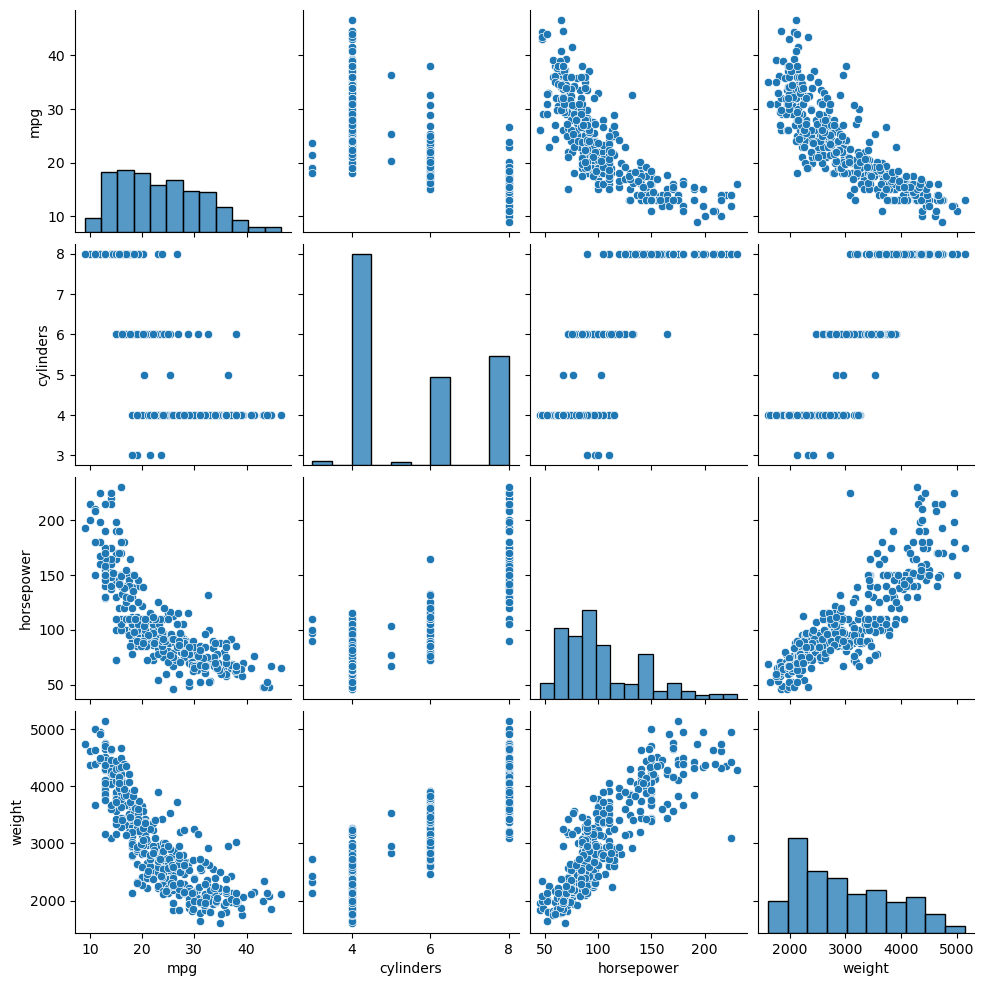

In [9]:
# 5) seaborn 라이브러리의 pairplot()를 이용하여 데이터프레임의 열을 2개씩 짝을 지을 수 있는 모든 경우의 수에 대하여 두 변수간의 산점도를 그린다.
# 단, 자기 자신과의 관계는 히스토그램으로 표시한다.
# pairplot()는 모든 경우의 수에 대하여 그래프로 그릴 수 있다.

grid_ndf = sns.pairplot(ndf)
plt.show()
plt.close()

In [12]:
# 4. 훈련/검증 데이터 분할
# 위에서 그린 산점도에서 'mpg'열과 선형관계를 보이는 'horsepower'열과 'weight'열을 독립변수 X로 선택한다.
# 두 변수간의 회귀방정식을 찾을 차례이다. --> 훈련 데이터와 검증 데이터로 나누어 모형을 구축한다.


# 'weight'열을 X로 선택하고 7:3의 비율로 분할한다.
X = ndf[['weight']]  # 독립변수 X
y = ndf['mpg']       # 종속변수 Y

# train데이터와 test데이터로 구분 (7:3)
from sklearn.model_selection import train_test_split
X_test, X_train, y_test, y_train = train_test_split(X,               # 독립 변수
                                                   y,                # 종속 변수
                                                   test_size=0.3,    # 검증 30%
                                                   random_state=10)  # 랜덤 추출 값
print('train data 개수 :', len(X_train))
print('test data 개수 :', len(X_test))

train data 개수 : 118
test data 개수 : 274


In [13]:
# 5. 모형 학습 및 검증
# sklearn 라이브러리에서 선형회귀분석 모듈을 사용한다.
# LinearRegression()로 회귀분석 모형 객체를 생성하여 lr에 저장한다.
# lr에 fit()를 적용하고 훈련데이터(X_train, y_train)를 전달하면 모형이 학습을 통해 회귀방정식의 계수 a,b를 구한다.
# 학습을 마친 모형의 예측 능력을 평가하기 위해 검증 데이터를 score()에 전달하여 lr모형의 결정계수(R-제곱)를 구한다.
# 결정계수 값이 클수록 모형의 예측 능력이 좋다고 판단한다.

# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)

0.6827183354225186


In [14]:
# 회귀선의 관계식을 확인할 수 있다.
# 회귀선의 기울기
print('기울기 a :', lr.coef_)
# 회귀선의 y절편
print('y절편 :', lr.intercept_)

기울기 a : [-0.00732683]
y절편 : 44.807724672156155


/var/folders/84/8v51qpn15dj7070dhwh3rcsc0000gn/T/ipykernel_99829/3295910838.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist=False, label='y')
/var/folders/84/8v51qpn15dj7070dhwh3rcsc0000gn/T/ipykernel_99829/3295910838.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  a

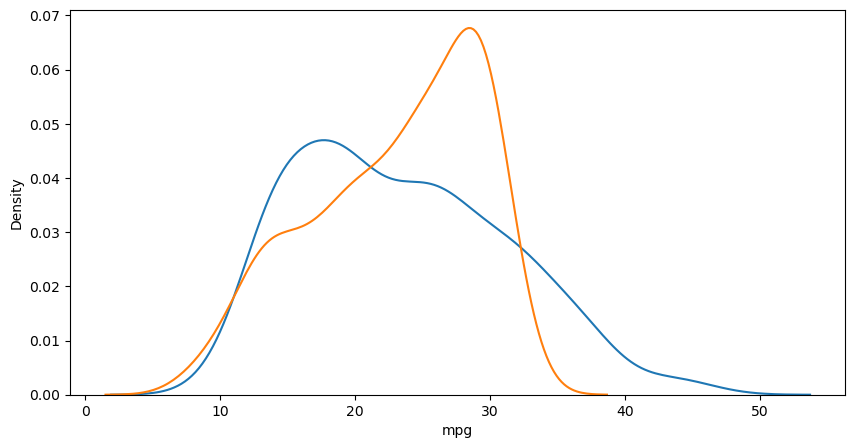

In [15]:
# 모형이 예측한 결과와 실제 값을 비교해본다.
# 독립변수 전체 데이터 X를 predict()에 입력하여 모형이 반환하는 예측값을 y_hat에 저장한다.
# 실제 값 y와 모형의 예측값 y_hat을 같은 화면에 그려 분포도를 비교한다.
# seaborn 라이브러리의 distplot()를 사용한다.

# 모형에 대해 전체 X 데이터를 입력하여 예측값 y_hat을 실제값 y와 비교
y_hat = lr.predict(X)

plt.figure(figsize=(10,5))
ax1 = sns.distplot(y, hist=False, label='y')
ax2 = sns.distplot(y_hat, hist=False, label='y_hat', ax=ax1)
plt.show()
plt.close()

## 1-2 ) 다항 회귀분석
$$ Y = aX^2 + bX + c $$  
* 다항회귀분석(Polynomial Regression)은 2차함수 이상의 다항함수를 이용하여 두 변수간의 선형 관게를 설명하는 알고리즘이다.
> X와 Y 사이의 선형의 상관관계가 있지만, 직선보다는 곡선으로 설명하는 것이 적합할 때에는 단순회귀분석은 부적합하다.  
이럴 때 *다항함수*를 사용하면 보다 복잡한 곡선 형태의 회귀선을 표현할 수 있다.

In [22]:
# 1. 데이터 준비
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./auto-mpg.csv', header=None)
df.columns=['mpg', 'cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

# horsepower열의 자료형 변경(문자열 -> 숫자)
df['horsepower'].replace('?',np.nan,inplace=True)
df.dropna(subset=['horsepower'],axis=0,inplace=True)
df['horsepower'] = df['horsepower'].astype('float')

# 분석에 활용할 열 선택
ndf = df[['mpg','cylinders','horsepower','weight']]

# ndf 데이터를 train data와 test data로 구분(7:3)
X = ndf[['weight']] # 독립변수 X
y = ndf['mpg']      # 종속변수 y

# train data : test data = 7 : 3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10)

print('훈련데이터 :', X_train.shape)
print('검증 데이터 :', X_test.shape)

훈련데이터 : (274, 1)
검증 데이터 : (118, 1)


In [24]:
# 모형 학습 및 검증
# sklearn 라이브러리에서 선형회귀분석을 위한 LinearRegression()와 다항식 변환을 위한 PolynomialFeatures()를 불러온다.
# PolynomialFeatures(degree=2)명령으로 2차항 객체인 poly를 생성한다.
# 독립 변수로 사용할 X_train 데이터를 fit_transform()에 전달하면 2차항 회귀분석에 맞게 변환된다.
# X_train의 1개 열이 X_train_poly에서는 3개의 열로 늘어난다.

# sklearn library에서 필요한 모듈 가져오기
from sklearn.linear_model import LinearRegression # 선형회귀분석
from sklearn.preprocessing import PolynomialFeatures # 다항식 변환

# 다항식 변환
poly = PolynomialFeatures(degree=2)  # 2차항 적용
X_train_poly = poly.fit_transform(X_train)  # X_train 데이터를 2차항으로 변형

print("원 데이터 :", X_train.shape)
print("2차항 변환 데이터 :", X_train_poly.shape)

원 데이터 : (274, 1)
2차항 변환 데이터 : (274, 3)


In [27]:
# LinearRegression()로 회귀분석 모형 객체를 생성하여 변수 pr에 저장한다.
# 2차항으로 변환된 훈련데이터(X_train_poly, y_train)를 fit()에 전달하여 pr모형을 학습시킨다.
# 모형 학습이 완료되면 검증 데이터를 사용하여 모형의 예측 능력을 평가한다.
# 검증 데이터 또한 poly 객체를 사용하여 2차항으로 변환해주어야한다.
# score()로 모형의 결정계수(R-제곱)을 구한다.

# train data를 가지고 모형 학습
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
X_test_poly = poly.fit_transform(X_test)  # X_test 데이터를 2차항으로 변형
r_square = pr.score(X_test_poly, y_test)
print(r_square)

0.7087009262975688


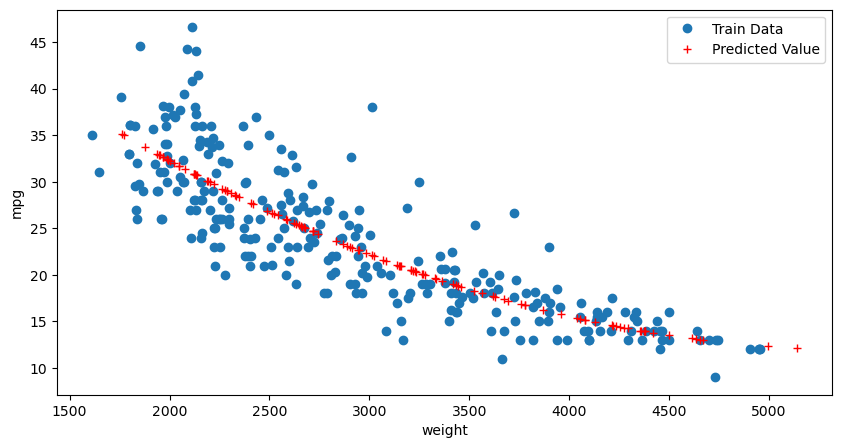

In [28]:
# 훈련 데이터의 분포와 학습된 모형의 회귀선을 그래프로 출력해서 비교한다.
# 2차항으로 변환된 검증데이터 (X_test_poly)를 predict()에 입력하여 예측한 결과인 y_hat_test를 빨간 점('+')로 표시하면 회귀선이 된다.
# 모형의 결정계수(R-제곱)이 높아진 것에서 알 수 있듯이 직선으로 표시된 단순회귀분석에 비해 데이터의 패턴을 더욱 잘 설명한다고 말할 수 있다.

# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력
y_hat_test = pr.predict(X_test_poly)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train, y_train, 'o', label='Train Data') # 데이터 분포
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

/var/folders/84/8v51qpn15dj7070dhwh3rcsc0000gn/T/ipykernel_99829/2589062407.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist=False, label='y')
/var/folders/84/8v51qpn15dj7070dhwh3rcsc0000gn/T/ipykernel_99829/2589062407.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  a

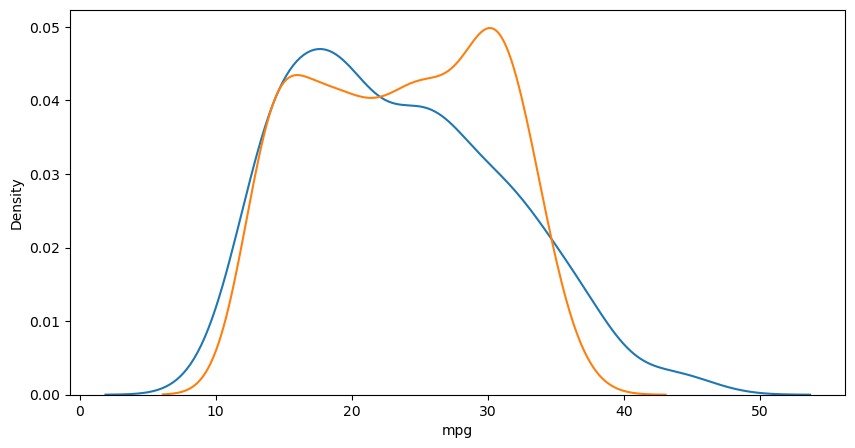

In [29]:
# 모형이 학습한 결과와 실제 값을 비교한다.
# 데이터셋의 전체 X 데이터를 2차항으로 변환하여 predict()에 전달한다.
# 여기서 모형이 예측한 값을 y_hat에 저장한다.
# seaborn 라이브러리의 distplot()를 사용하여 실제값 y와 예측값 y_hat의 분포 차이를 비교한다.

# 앞에서 살펴본 단순회귀분석의 결과와 비교할 때 데이터가 어느 한쪽으로 편향되는 경향이 상당히 감소한 것을 알 수 있다. (더 적합한 모형)

# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
X_poly = poly.fit_transform(X)
y_hat = pr.predict(X_poly)

plt.figure(figsize=(10,5))
ax1 = sns.distplot(y, hist=False, label='y')
ax2 = sns.distplot(y_hat, hist=False, label='y_hat', ax=ax1)
plt.show()
plt.close()

## 1-3 ) 다중 회귀분석
$$ Y = b + a_1X_1 + a_2X_2 + ... + a_nX_n $$
$$각 독립변수의 계수 (a_1, a_2, a_3, ... ,a_n)와 상수항 b 에 적절한 값을 찾아 모형을 완성한다.$$
> 모형의 예측값인 종속 변수의 실제 데이터를 알고 있는 상태에서 학습하기 때문에 지도학습으로 분류된다.
* cf) 단순회귀분석은 소득이 증가하면 소비도 증가하듯, Y에 영향을 주는 독립변수가 X 하나인 경우를 말한다.
* 하지만 소비에 영향을 주는 독립 변수에는 소득 외에도 자녀의 수, 거주지 등 다른 요인이 있을 수 있다.
* => 이처럼 여러 개의 X가 Y에 영향을 주고 선형관계를 갖는 경우에 다중회귀분석(Multivariate Regression)을 사용한다.

In [32]:
# 데이터 준비
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

# horsepower열의 자료형 변경 (문자 -> 숫자)
df['horsepower'].replace("?",np.nan,inplace=True)
df.dropna(subset=['horsepower'], inplace=True)
df['horsepower'] = df['horsepower'].astype('float')

# 분석에 활용할 열 선택
ndf = df[['mpg','cylinders','horsepower','weight']]

# 속성 선택
X = ndf[['cylinders','horsepower','weight']]  # 독립 변수 : X1, X2, X3
y - ndf['mpg']  # 종속 변수 : Y

# train data : test data = 7 : 3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print('훈련 데이터: ', X_train.shape)
print('검증 데이터; ', X_test.shape)

훈련 데이터:  (274, 3)
검증 데이터;  (118, 3)


In [35]:
# 모형 학습 및 검증
# LinearRegression()을 이용하여 회귀분석 모형 객체(lr)를 생성한다.
# 분리한 훈련데이터(X_train, y_train)를 입력하여 fit()로 모형을 학습시킨다.
# 모형의 학습이 완료되면 훈련데이터를 제외한 나머지 검증 데이터(X_test, y_test)를 사용하여 모형의 평가 지표인 결정계수(R-제곱)을 구한다.

# 선형회귀분석 모듈
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)

# 회귀선의 기울기
print('X 변수의 계수 a: ', lr.coef_)

# 회귀선의 y절편
print('상수항 b: ', lr.intercept_)

0.6939048496695601
X 변수의 계수 a:  [-0.60691288 -0.03714088 -0.00522268]
상수항 b:  46.41435126963401


#### 모형이 예측한 값과 실제 값을 비교한다.
#### X_test(검증데이터)를 predict()에 입력하여 예측한 값을 y_hat에 저장하고 y_test(실제 데이터)의 분포와 비교한다.
#### 단순회귀분석의 결과와 비교할 때 데이터가 어느 한쪽으로 편향되는 경향은 그대로 남아있지만 그래프의 첨도가 약간 누그러진 것을 볼 수 있다.

/var/folders/84/8v51qpn15dj7070dhwh3rcsc0000gn/T/ipykernel_99829/843676939.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, label='y_test')
/var/folders/84/8v51qpn15dj7070dhwh3rcsc0000gn/T/ipykernel_99829/843676939.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

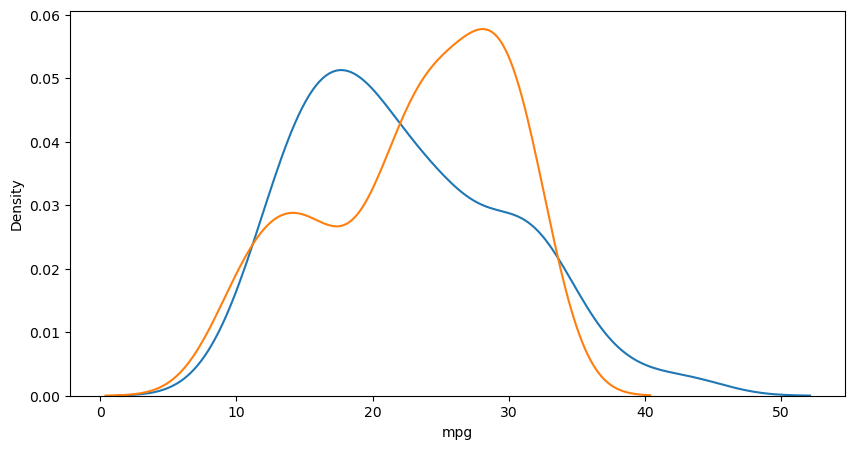

In [36]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력
y_hat = lr.predict(X_test)

plt.figure(figsize=(10,5))
ax1 = sns.distplot(y_test, hist=False, label='y_test')
ax2 = sns.distplot(y_hat, hist=False, label='y_hat', ax=ax1)
plt.show()
plt.close()

# 🎀  2. 분류(Classification)
> 예측하려는 대상의 속성을 입력 받고, 목표 변수가 갖고 있는 범주 값 안에서 어느 한 값으로 분류하여 예측한다.  
훈련 데이터에 목표 변수 값 0 또는 1을 입력하기 때문에 *지도 학습 유형*에 속한다.

## 2-1 ) KNN
* k-Nearest-Neighbors의 약칭으로, k개의 가까운 이웃이라는 뜻이다.
* 새로운 관측값이 주어지면 기존 데이터 중에서 가장 속성이 비슷한 k개의 이웃을 먼저 찾는다.
* 그리고 가까운 이웃들이 갖고 있는 목표 값과 같은 값으로 분류하여 예측한다.
> k값에 따라 예측의 정확도가 달라지므로, 적절한 k값을 찾는 것이 매우 중요하다.

In [2]:
# survived열의 생존자는 1, 미생존자는 0

# 1. 데이터 준비
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [3]:
# 2. 데이터 탐색
# df.info()로 데이터의 자료형과 개수를 확인해본 결과, 'age','embarked','dock'등 일부 열에 누락 데이터가 포함되어있다.
# 데이터의 특성과 분석 목표에 맞춰 누락 데이터를 처리해야한다.

# deck열 : 유효 값이 203개 -> 열제거(NaN값 많음)
# embark_town == embarked  -> 열제거(중복)
rdf = df.drop(['deck','embark_town'],axis=1)
print(rdf.columns.values)

['survived' 'pclass' 'sex' 'age' 'sibsp' 'parch' 'fare' 'embarked' 'class'
 'who' 'adult_male' 'alive' 'alone']


In [4]:
# 'age'열에 누락데이터가 177개 포함되어있기에 이를 모두 제거한다.
# 177명의 승객을 포기하고 나이 데이터가 있는 714명의 승객 만을 분석 대상으로 한다.

rdf = rdf.dropna(subset=['age'], how='any',axis=0)
print(len(rdf))

714


In [5]:
# embarked열에는 승객이 타이타닉호에 탑승한 도시명의 첫 글자가 드러있다.
# 누락 데이터가 2개에 불과하므로 탑승한 승객이 가장 많은 도시명으로 치환한다.
# value_counts()를 idxmax()를 사용하여 승객이 가장 많이 탑승한 도시명의 첫 글자가 's'라는 것을 확인할 수 있다.
# discribe(include='all')로 'embarked'열의 최빈값을 확인해도 같은 결과를 얻는다.
# 그리고 'embarked'열에 fillna()를 사용하여 누락데이터를 'S'값으로 바꾼다.

# embarked열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
print(most_freq)
print('\n')

print(rdf.describe(include='all'))
print('\n')

rdf['embarked'].fillna(most_freq, inplace=True)

S


          survived      pclass   sex         age       sibsp       parch   
count   714.000000  714.000000   714  714.000000  714.000000  714.000000  \
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   453         NaN         NaN         NaN   
mean      0.406162    2.236695   NaN   29.699118    0.512605    0.431373   
std       0.491460    0.838250   NaN   14.526497    0.929783    0.853289   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    1.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    2.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    1.000000   
max       1.000000    3.000000   NaN   80.000000    5.000000    6.000000   

              fare embarked  class  who adult_male alive alone  
count   714.000000

In [8]:
# 3. 속성 성택
# 변수로 사용할 후보 열을 서낵한다. 예측변수로 'survived'(생존여부)열을 추가하고 설명변수로 사용할 후보 열을 6개 포함한다.
ndf = rdf[['survived','pclass','sex','age','sibsp','parch','embarked']]
ndf.head()  # 데이터 구성

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [9]:
# one-hot-encoding
# KNN에 적용하기 위해 'sex'와 'embarked'열의 범주형 데이터를 숫자형으로 변환한다.
# sex : 'female'과 'male'의 열 이름으로 갖는 2개의 더미 변수 열이 만들어진다.
# embarked : 3개의 더미변수열이 만들어지는데, prefix='town'옵션을 사용하여 열 이름에 두어 'town'을 붙인다.
# concat()로 생성된 더미 변수 열을 기존 데이터프레임에 연결한다.
# sex와 embarked열을 삭제한다.

onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex','embarked'], axis=1, inplace=True)
ndf.head()

,survived,pclass,age,sibsp,parch,female,male,town_C,town_Q,town_S
0,0,3,22.0,1,0,False,True,False,False,True
1,1,1,38.0,1,0,True,False,True,False,False
2,1,3,26.0,0,0,True,False,False,False,True
3,1,1,35.0,1,0,True,False,False,False,True
4,0,3,35.0,0,0,False,True,False,False,True


In [11]:
# 4. 훈련/검증데이터 분할
# 예측변수인 'survived'열을 변수 y에 저장, 나머지 열들을 설명변수로 사용하기 위해 변수 X에 할당한다.
# 설명 변수 열들이 갖는 데이터의 상대적 크기 차이를 없애기 위하여 정규화 과정을 거친다.
# sklearn의 preprocessing 모듈을 사용한다.

# 변수 선택
X = ndf[['pclass','age','sibsp','parch','female','male','town_C','town_Q','town_S']]  # 설명 변수 X
y = ndf['survived']   # 예측 변수 y

# 설명변수 X 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data : test data = 7 : 3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print('train data 개수 :', X_train.shape)
print('test data 개수 :', X_test.shape)

train data 개수 : (499, 9)
test data 개수 : (215, 9)


### 분류 모형의 예측력을 평가하는 지표
> Confusion Matrix

In [12]:
# 5. 모형 학습 및 검증
# sklearn 에서 KNN분류 모형 가져오기
from sklearn.neighbors import KNeighborsClassifier

# 모형 객체 설정 (k=5)
knn = KNeighborsClassifier(n_neighbors=5)

# train data를 가지고 모형 학습
knn.fit(X_train, y_train)

# test data를 가지고 y_hat을 예측 (분류)
y_hat = knn.predict(X_test)

# y_hat(모형이 분류한 예측값)과 y_test(실제 값)을 비교한다.
print(y_hat[0:10])
print(y_test.values[0:10])


[0 0 1 0 0 1 1 1 0 0]
[0 0 1 0 0 1 1 1 0 0]


In [13]:
# 모형의 예측 능력을 평가한다.
# metrics 모듈의 confusion_matrix()를 사용한다.
# TP : 109 (미생존자를 정확히 예측)
# FP : 16 (미생존자를 생존자로 잘못 분류)
# FN : 25 (생존자를 미생존자로 잘못 분류)
# TN : 65 (생존자를 정확히 예측)

from sklearn import metrics
knn_metrix = metrics.confusion_matrix(y_test, y_hat)
print(knn_metrix)

[[111  14]
 [ 24  66]]


In [15]:
# 모형 성능 평가 - 평가 지표 계산
knn_report = metrics.classification_report(y_test, y_hat)
print(knn_report)

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       125
           1       0.82      0.73      0.78        90

    accuracy                           0.82       215
   macro avg       0.82      0.81      0.82       215
weighted avg       0.82      0.82      0.82       215



## 2-2 ) SVM(Support Vector Machine)

In [23]:
import pandas as pd
import seaborn as sns

# 데이터 준비
df = sns.load_dataset('titanic')

# 데이터 탐색 & 전처리
rdf = df.drop(['deck','embark_town'],axis=1) # NaN값이 많은 deck열, embarked의 내용과 겹치는 embark_town열 삭제
rdf = rdf.dropna(subset=['age'], how='any',axis=0) # age열에 나이 데이터가 없는 모든 행 삭제(age열 891 중 177개의 NaN값)
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
rdf['embarked'].fillna(most_freq, inplace=True)

# 분석에 사용할 속성 선택
ndf = rdf[['survived','pclass','sex','age','sibsp','parch','embarked']]
# one-hot-encoding
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)
onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)
ndf.drop(['sex','embarked'], axis=1, inplace=True)

# 데이터셋 구분
X = ndf[['pclass','age','sibsp','parch','female','male','town_C','town_Q','town_S']]  # 독립 변수 X
y = ndf['survived']  # 종속 변수 y

# 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data : test data = 7 : 3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print('train data 개수 :', X_train.shape)
print('test data 개수 :', X_test.shape)

train data 개수 : (499, 9)
test data 개수 : (215, 9)


In [24]:
# 모형 학습 및 검증
# sklearn 에서 가져온 svm모듈의 SVC()를 활용하여 모형 객체(svm_model)를 생성한다.
# 이때 데이터를 벡터 공간으로 매핑하는 함수를 커널(kernel)이라고 하는데, kernel='rbf'옵션으로 RBF(Radial Basis Function)을 적용한다.
# 이 외에 Linear, Polynimial, Sigmoid 등의 커널이 있다.

from sklearn import svm

# 모형 객체 생성
svm_model = svm.SVC(kernel='rbf')
# train data를 가지고 모형 학습
svm_model.fit(X_train, y_train)
# test data를 가지고 y_hat 예측 (분류)
y_hat = svm_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[0 0 1 0 0 0 1 0 0 0]
[0 0 1 0 0 1 1 1 0 0]


In [25]:
# 모형의 예측 능력을 평가하는 지표를 계산한다.
# confusion_matrix()로 Confusion Matrix를 계산한다.
# 미생손자가 0의 값을 갖고, 생존자가 1의 값을 갖는다.
# 215명의 승객 중에서 미생존자를 정확히 예측한 TP는 120
# FP : 5 (미생존자를 생존자로 잘못 분류)
# FN : 35 (생존자를 미생존자로 잘못 분류)
# TN : 55 (생존자를 정확히 예측)

from sklearn import metrics
svm_matrix = metrics.confusion_matrix(y_test, y_hat)
print(svm_matrix)

# 모형 성능 평가 - 평가지표계산
svm_report = metrics.classification_report(y_test, y_hat)
print(svm_report)

[[120   5]
 [ 35  55]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.86       125
           1       0.92      0.61      0.73        90

    accuracy                           0.81       215
   macro avg       0.85      0.79      0.80       215
weighted avg       0.83      0.81      0.81       215



## 2-3 ) Decision Tree
> 의사결정 나무  
컴퓨터 알고리즘에서 즐겨 사용하는 tree구조를 사용하고, 각 node(분기점)에서는 분석 대상의 속성이 위치한다.  
각 분기점마다 목표 값을 가장 잘 분류할 수 있는 속성을 찾아서 배치하고, 해당 속성이 갖는 값을 이용하여 새로운 branch(가지)를 만든다.
* Entropy : 다른 종류의 값들이 섞여 있는 정도를 나타낸다.  
    * entropy가 낮을수록 분류가 잘 된 것이다.
    * entropy가 일정 수준이하로 낮아질 때까지 앞의 과정을 반복한다.

In [28]:
# 1. 데이터 준비
import pandas as pd
import numpy as np

uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(uci_path, header=None)
df.columns = ['id','clump','cell_size','cell_shape','adhesion','epithlial','bare_nuclei','chromatin','normal_nucleli','mitoses','class']
df.info()   # bare_nuclei이 'object'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              699 non-null    int64 
 1   clump           699 non-null    int64 
 2   cell_size       699 non-null    int64 
 3   cell_shape      699 non-null    int64 
 4   adhesion        699 non-null    int64 
 5   epithlial       699 non-null    int64 
 6   bare_nuclei     699 non-null    object
 7   chromatin       699 non-null    int64 
 8   normal_nucleli  699 non-null    int64 
 9   mitoses         699 non-null    int64 
 10  class           699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [35]:
# bare_nuclei NaN값 제거하기
print(df['bare_nuclei'].unique())  # NaN값 확인하기, -> '?'이 있어 int가 아닌 object로 인식된다.
print('\n')
df['bare_nuclei'].replace('?', np.nan, inplace=True)       # ?값을 NaN값으로 대체한다.
df.dropna(subset=['bare_nuclei'], axis=0, inplace=True)    # NaN값 drop
df['bare_nuclei'] = df['bare_nuclei'].astype('int')        # int형으로 변환
df.info()

[ 1 10  2  4  3  9  7  5  8  6]


<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              683 non-null    int64
 1   clump           683 non-null    int64
 2   cell_size       683 non-null    int64
 3   cell_shape      683 non-null    int64
 4   adhesion        683 non-null    int64
 5   epithlial       683 non-null    int64
 6   bare_nuclei     683 non-null    int64
 7   chromatin       683 non-null    int64
 8   normal_nucleli  683 non-null    int64
 9   mitoses         683 non-null    int64
 10  class           683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


In [42]:
# 데이터셋 구분
X = df[['clump','cell_size','cell_shape','adhesion','epithlial','bare_nuclei','chromatin','normal_nucleli','mitoses']]  # 설명 변수 X
y = df['class']  # 예측 변수 y

# 설명 변수 데이터 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data : test data = 7 : 3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print(X_train.shape)
print(X_test.shape)

(478, 9)
(205, 9)


In [43]:
# sklearn 라이브러리의 tree모듈을 임포트한다.
# DecisionTreeClassifier()를 함수 사용하여 모형 객체(tree_model)를 생성한다.
# entropy : 각 분기점에서 최적의 속성을 찾기 위해 분류 정도를 평가하는 기준
# 트리 레벨을 5로 지정한다. (5단계까지 가지를 확장할 수 있다는 뜻이다.)
# 레벨이 많아질수록 모형 학습에 사용하는 훈련 데이터에 대한 예측이 정확해진다.
# overfitting :  하지만 모형이 훈련데이터에만 지나치게 최적화되어 실제 데이터 예측 능력은 떨어지는 문제가 발생한다.

from sklearn import tree

# 모형 객체 생성( criterion='entropy' 적용 )
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

# train_data로 모형 학습
tree_model.fit(X_train, y_train)

# test data로 y_hat 예측 (분류)
y_hat = tree_model.predict(X_test)  # 2: benign(양성), 4: malignant(악성)

print(y_hat[0:10])
print(y_test.values[0:10])

[4 4 4 4 4 4 2 2 4 4]
[4 4 4 4 4 4 2 2 4 4]


In [46]:
# 모형 평가 지표를 계산한다.
# 양성종양의 목표값은 2, 악성종양은 4
# Confusion Matrix로 나타내면 
# TP (양성을 정확히 예측) : 127개
# FP (양성을 악성으로 잘못 분류) : 4개
# FN (악성을 양성으로 잘못 분류) : 2개
# TN (악성을 정확히 예측) : 72개

# classification_report()로 precision, recall, f1-score 지표를 출력한다.
from sklearn import metrics
tree_matrix = metrics.confusion_matrix(y_test, y_hat)
print(tree_matrix)
print('\n')

# 모형 성능 평가 - 평가 지표 계산
tree_report = metrics.classification_report(y_test, y_hat)
print(tree_report)

[[127   4]
 [  2  72]]


              precision    recall  f1-score   support

           2       0.98      0.97      0.98       131
           4       0.95      0.97      0.96        74

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



# 🎀  3. 군집(Clustering)
> 군집분석은 데이터셋의 관측값이 갖고 있는 여러 속성을 분석하여 서로 비슷한 특징을 갖는 관측값끼리 같은 집단으로 묶는 알고리즘이다.  
다른 클러스터간에는 서로 완전하게 구분되는 특성을 갖기 때문에 어느 클러스터에도 속하지 못하는 관측값이 존재할 수 있다,
-> 이런 특성을 이용하여 이상값, 중복값을 찾는데에 활용하기도 한다.

> *비지도학습* 유형이다.  
> * 분류 알고리즘(정답을 알고있는 상태에서 학습 과정을 거친다.)과 비슷 : 관측값을 몇 개의 집단으로 나눈다.
> * 군집분석은 정답이 없는 상태에서 데이터 자체의 유사성만을 기준으로 판단한다.  
>> 예시  
신용카드 부정 사용 탐지, 구매 패턴 등 소비사 행동 특성을 그룹화하는데 사용된다.  
-> 어떤 소비자와 유사한 특성을 갖는 집단을 구분하게 되면, 같은 집단 내의 다른 소비자를 통해 새로운 소비자의 구매 패턴이나 행동을 예측하는데 활용할 수 있다.

## 3-1 ) K-Means
> 데이터 간의 유사성을 측정하는 기준으로 각 클러스터의 중심까지의 거리를 이용한다.  
벡터 공간에 위치한 어떤 데이터에 대하여 k개의 클러스터가 주어졌을 때, 클러스터의 중심까지 거리가 가장 가까운 클러스터로 해당 데이터를 할당한다.  
다른 클러스터 간에는 서로 완전하게 구분하기 위하여 일정한 거리 이상 떨어져야한다.  
> * 몇개의 클러스터로 데이터를 구분할 것인지를 결정하는 k값에 따라 모형의 성능이 달라진다.  
* 일반적으로 k가 클수록 모델의 정확도는 개선되지만, k값이 너무 커지면 선택지가 너무 많아지므로 분석의 효과가 사라진다.

In [53]:
# 데이터 준비
import pandas as pd
import matplotlib.pyplot as plt

uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)
df
# Channel : 호텔, 레스토링 또는 소매점 등 판매채널 값
# Region : 고객 소재지

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [57]:
# 데이터 전처리
# 분석에 사용할 속성 선택
X = df.iloc[:,:]
print(X[:5])
print('\n')

# 설명 변수 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
print(X[:5])

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]


In [62]:
# cluster 모듈을 활용한다.
# KMeans()로 모형 객체를 생성하는데, n_clusters 옵션을 사용하여 클러스터의 개수를 5로 지정한다.
# 앞에서 선택한 학습데이터를 fit()에 전달하고 모형에 적용하면 모형이 스스로 학습하여 클러스터의 개수만큼 데이터를 구분한다.
# 모형의 labels_ 속성에 구분한 클러스터 값이 입력된다.

from sklearn import cluster

# 모형 객체 생성
kmeans = cluster.KMeans(init='k-means++', n_clusters=5, n_init=10)

# 모형 학습
kmeans.fit(X)

# 예측 (군집)
cluster_label = kmeans.labels_
print(cluster_label)
print('\n')

# 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())

[1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 2 1 2 1 2 2 3 1 1 2 2 1 2 2 2 2 2 2 1 2
 1 1 2 2 2 1 1 1 1 1 4 1 1 2 2 1 1 2 2 4 1 2 2 1 4 1 1 2 4 2 1 2 2 2 3 2 1
 1 2 2 1 2 2 2 1 1 2 1 4 4 3 2 2 2 2 4 3 1 2 1 2 2 2 1 1 1 3 2 2 1 1 1 1 2
 1 2 2 2 2 2 2 2 2 2 2 2 1 2 3 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
 2 2 2 2 2 2 2 1 1 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 2 1 2 2 2 2 2 3 2 3 2
 2 2 2 1 1 2 2 2 1 2 2 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 4 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 4 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 1 0 1
 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 3 0 0 0 0 0 1 0
 4 0 1 0 0 0 0 1 1 2 1 2 2 1 1 2 1 2 1 2 1 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2
 1 2 2 1 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 1 1 2 2 2 2 2 2 1 1 2 1 2 2 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2]


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper   
0        2       3  12669  9656    

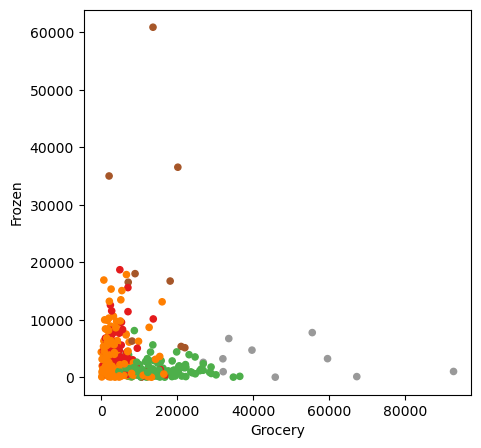

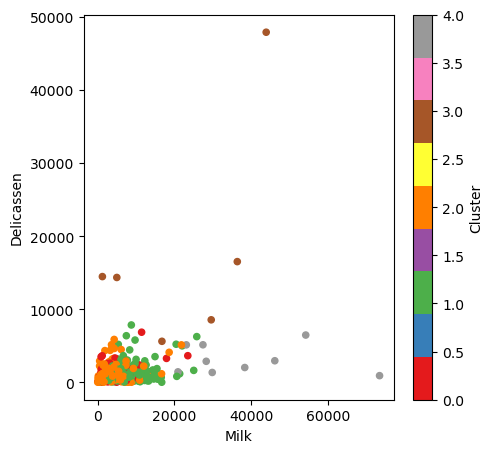

In [65]:
# 모델은 8개의 변수를 이용하여 각 관측값을 5개의 클러스터로 구분한다.
# 8개의 변수를 1개 그래프로 표현할 수 없기 때문에 2개의 변수를 선택하여 관측값의 분포를 그려본다.
# (단, 모델의 예측값은 매번 실행할 때마다 달라지므로 그래프의 형태도 달라지는 점에 유의한다.)

df.plot(kind='scatter',x='Grocery', y='Frozen', c='Cluster', cmap='Set1', colorbar=False, figsize=(5,5))
df.plot(kind='scatter',x='Milk', y='Delicassen', c='Cluster', cmap='Set1', colorbar=True, figsize=(5,5))
plt.show()
plt.close()

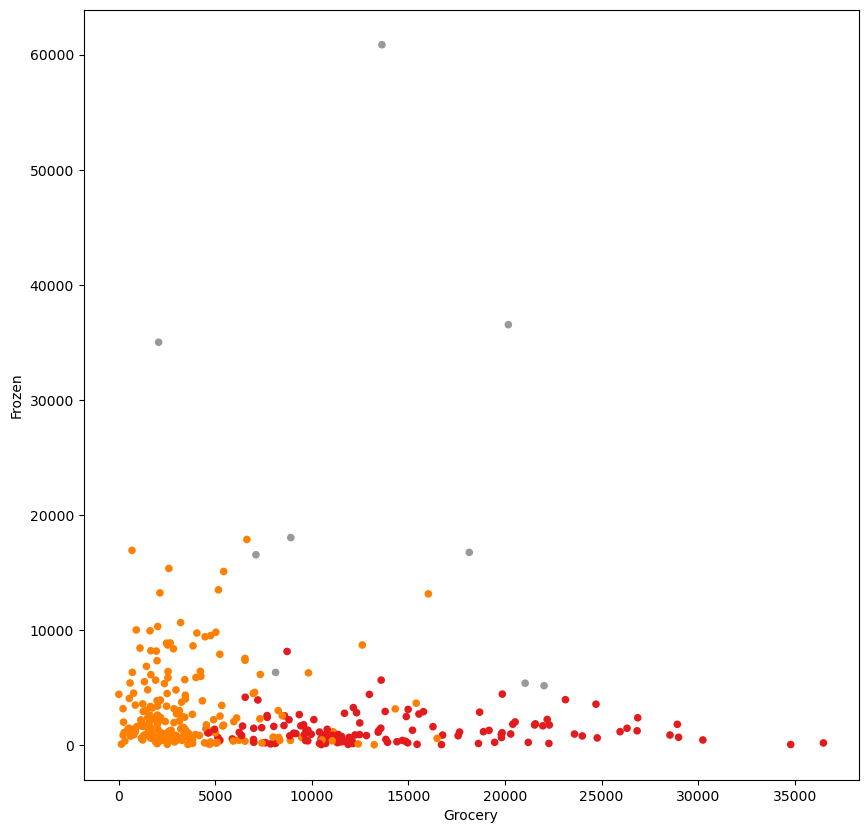

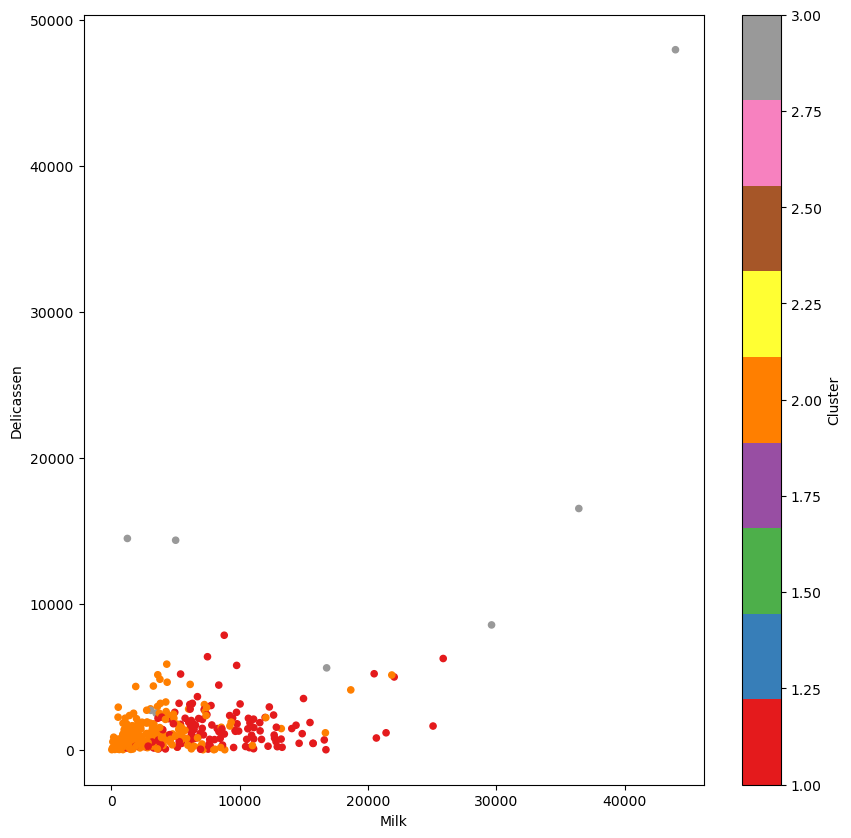

In [67]:
# 다른 값들에 비해 지나치게 큰 값으로 구성되는 클러스터에 속하는 값들을 제외하고 다시 그려본다.
# -> 데이터들이 몰려있는 구간을 확대하여 자세하게 파악할 수 있다.
# 클러스터 라벨이 0, 4인 데이터를 제외하고 클러스터 1,2,3에 속하는 데이터만을 변수 ndf에 저장한다.

# 큰 값으로 구성된 클러스터(0,4) 제외 - 값이 몰려있는 구간을 자세하게 분석한다.
mask = (df['Cluster']==0) | (df['Cluster']==4)
ndf = df[~mask]

ndf.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', colorbar=False, figsize=(10,10))
ndf.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', colorbar=True, figsize=(10,10))
plt.show()
plt.close()

## 3-2 ) DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

데이터가 위치하고있는 공간 밀집도를 기준으로 클러스터를 구분한다.  
* core point : 자기 중심으로 반지름 R의 공간에 최소 M개의 포인트가 존재하는 점
* border point : 코어 포인트는 아니지만 반지름 R 안에 다른 코어 포인트가 있을 경우
* noise(outlier) : 코어 포인트도 아니고 경계 포인트에도 속하지 않는 점

In [4]:
# 데이터 준비
import pandas as pd
import folium

file_path = './2016_middle_shcool_graduates_report.xlsx'
df = pd.read_excel(file_path, header=0)

# Ipython console display option setting
pd.set_option('display.width',None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_colwidth', 20)
pd.set_option('display.unicode.east_asian_width', True)

print(df.columns.values)
print('\n')
print(df.info())

['Unnamed: 0' '지역' '학교명' '코드' '유형' '주야' '남학생수' '여학생수' '일반고' '특성화고' '과학고'
 '외고_국제고' '예고_체고' '마이스터고' '자사고' '자공고' '기타진학' '취업' '미상' '위도' '경도']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  415 non-null    int64  
 1   지역          415 non-null    object 
 2   학교명         415 non-null    object 
 3   코드          415 non-null    int64  
 4   유형          415 non-null    object 
 5   주야          415 non-null    object 
 6   남학생수        415 non-null    int64  
 7   여학생수        415 non-null    int64  
 8   일반고         415 non-null    float64
 9   특성화고        415 non-null    float64
 10  과학고         415 non-null    float64
 11  외고_국제고      415 non-null    float64
 12  예고_체고       415 non-null    float64
 13  마이스터고       415 non-null    float64
 14  자사고         415 non-null    float64
 15  자공고         415 non-null    float64
 16  기타진학       

In [5]:
# 위도, 경도 열을 folium.CircleMaker()에 전달하면 각 위치를 지도에 원형 마커로 표시한다.
# '학교명'을 popup옵션에 할당하여 원형 마커를 클릭할 때 학교 명이 팝업으로 표시되도록 설정한다.
# 지도객체는 웹으로 구현되기때문에 save()를 사용하여 HTML로 저장해야한다.

# 지도에 위치 표시
mschool_map = folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain', zoom_start=12)

# 중학교 위치 정보를 CircleMaker로 표시
for name, lat, lng in zip(df.학교명, df.위도, df.경도):
    folium.CircleMarker([lat,lng],
                      radius=5,
                      color='brown',
                      fill=True,
                       fill_color='coral', # 원을 채우는 색
                       fill_opacity=0.7,   # 투명도
                       popup=name).add_to(mschool_map)
# 지도를 html파일로 저장하기
mschool_map.save('./seoul_mschool_location.html')

In [6]:
# 데이터 전처리

# '지역','코드','유형','주야' -> one-hot-encoding 하여 'location','code','type','day'에 저장하고 df에 추가한다.
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
onehot_encoder = preprocessing.OneHotEncoder()

onehot_location = label_encoder.fit_transform(df['지역'])
onehot_code = label_encoder.fit_transform(df['코드'])
onehot_type = label_encoder.fit_transform(df['유형'])
onehot_day = label_encoder.fit_transform(df['주야'])

df['location'] = onehot_location
df['code'] = onehot_code
df['type'] = onehot_type
df['day'] = onehot_day

print(df.head())

   Unnamed: 0    지역                               학교명  코드  유형  ...   
0           0  성북구  서울대학교사범대학부설중학교.....       3  국립  ...  \
1           1  종로구  서울대학교사범대학부설여자중학교...     3  국립  ...   
2           2  강남구           개원중학교                     3  공립  ...   
3           3  강남구           개포중학교                     3  공립  ...   
4           4  서초구           경원중학교                     3  공립  ...   

         경도  location  code  type  day  
0  127.038909        16     0     1    0  
1  127.003857        22     0     1    0  
2  127.071744         0     0     0    0  
3  127.062201         0     0     0    0  
4  127.008900        14     0     0    0  

[5 rows x 25 columns]


### 모형 학습 및 검증
> '과학고','외고_국제고','자사고'열을 선택하여 설명변수 x로 할당한다.
> 1. 정규화 : StandardScaler()
> 2. 모델 객체(dbm) 생성 : cluster 모듈의 DBSCAN() 적용
> 3. R(eps=0.2), M(min_samples=5) : 밀도 계산의 기준이 되는 반지름R과 최소 포인트 개수를 옵션에 설정한다.
> 4. fit() : 학습 데이터를 dbm 모형에 전달하면 모형은 데이터를 여러 개의 클러스터로 구분한다.  
  
모형의 labels_ 속성을 확인하면 -1, 0,1,2,3의 5개 값이 확인된다.  
-1은 Noise를 나타내므로 모형이 구분한 클러스터는 Noise를 제외한 0,1,2,3으로 모두 4개가 된다.  
'Cluster'열에 모형이 분류한 클러스터 값을 입력하고, 데이터프레임에 새로운 열로 추가한다.

In [7]:
# sklearn 라이브러리에서 cluster 군집 모형 가져오기 
from sklearn import cluster

# 분석에 사용할 속성을 선택 (과학고, 외고국제고, 자사고 진학률)
columns_list = [9, 10, 13]
X = df.iloc[:, columns_list]
print(X[:5])
print('\n')

# 설명 변수 데이터를 정규화
X = preprocessing.StandardScaler().fit(X).transform(X)

# DBSCAN 모형 객체 생성
dbm = cluster.DBSCAN(eps=0.2, min_samples=5)

# 모형 학습
dbm.fit(X)   
 
# 예측 (군집) 
cluster_label = dbm.labels_   
print(cluster_label)
print('\n')

# 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head()) 

   특성화고  과학고  마이스터고
0     0.148   0.018       0.011
1     0.199   0.000       0.000
2     0.047   0.009       0.006
3     0.097   0.013       0.019
4     0.017   0.007       0.000


[-1  0 -1 -1  1  5 -1 -1  2 -1 -1 -1  2  0 -1 -1 -1 -1 -1  2 -1 -1 -1  0
  1  2 -1  1  0  0 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  3
 -1 -1 -1  3 -1  1 -1 -1  4 -1 -1  4 -1 -1  4  0 -1  5  0  6  1 -1  0  1
 -1  0  8 -1 -1 -1  4 -1  3 -1 -1  3  4 -1 -1 -1  3 -1  0  2 -1  0 -1 -1
  5  0  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  0 -1
 -1 -1  5  8  0 -1 -1 -1 -1 -1  7  3  0 -1  5  0  4 -1  5 -1 -1 -1 -1 -1
 -1  6 -1 -1 -1  8  4 -1 -1  6 -1 -1 -1 -1 -1  0  6 -1 -1 -1 -1 -1 -1  6
 -1 -1  7 -1 -1  6 -1  0  0 -1  3 -1  6  8 -1  6 -1 -1 -1 -1 -1 -1  5  0
  0 -1 -1 -1 -1  0  0 -1  0 -1 -1  6  0 -1 -1 -1 -1 -1  4 -1 -1  3 -1 -1
  0 -1 -1  9 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1  9  0
  9 -1 -1 -1 -1  5  0 -1 -1 -1  0  0 -1  0 -1 -1 -1 -1 -1  0  4 -1 -1  0
 -1 -1  0  0 -1

**groupby()** 를 사용하여 'Cluster'열을 기준으로 데이터프레임 그룹 객체로 변환한다.  
1. 지도에 다른 색으로 구분하여 그룹별 분포를 살펴보자.
2. Noise(-1)의 경우 회색으로 설정한다.
3. Noise가 255개이고, 각 클러스터에 속하는 포인트의 수는 0부터 순서대로 102, 45, 8, 5개이다.  
  
> * 클러스터 0은 외고(국제고)와 자사고 합격률은 높지만 과학고 합격자가 없다.
> * 클러스터 1은 자사고 합격자만 존재하는 그룹
> * 클러스터 2는 자사고 합격률이 매우 높으면서 과학고와 외고(국제고)합격자도 일부 존재한다.
> * 클러스터 3은 과학고 합격자 없이 외고(국제고)와 자사고 합격자를 배출한 점은 클러스터0과 비슷하지만 외고(국제고)합격률이 클러스터 0에 비해 현저히 낮다.

In [8]:
# 클러스터 값으로 그룹화하고, 그룹별로 내용 출력 (첫 5행만 출력)
grouped_cols = [0, 1, 3] + columns_list
grouped = df.groupby('Cluster')
for key, group in grouped:
    print('* key :', key)
    print('* number :', len(group))    
    print(group.iloc[:, grouped_cols].head())
    print('\n')

# 그래프로 표현 - 시각화
colors = {-1:'gray', 0:'coral', 1:'blue', 2:'green', 3:'red', 4:'purple', 
          5:'orange', 6:'brown', 7:'brick', 8:'yellow', 9:'magenta', 10:'cyan', 11:'tan'}

cluster_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster):  
    folium.CircleMarker([lat, lng],
                        radius=5,                   # 원의 반지름
                        color=colors[clus],         # 원의 둘레 색상
                        fill=True,
                        fill_color=colors[clus],    # 원을 채우는 색
                        fill_opacity=0.7,           # 투명도    
                        popup=name
    ).add_to(cluster_map)

# 지도를 html 파일로 저장하기
cluster_map.save('./seoul_mschool_cluster.html')

* key : -1
* number : 234
   Unnamed: 0    지역  코드  특성화고  과학고  마이스터고
0           0  성북구     3     0.148   0.018       0.011
2           2  강남구     3     0.047   0.009       0.006
3           3  강남구     3     0.097   0.013       0.019
6           6  강남구     3     0.015   0.015       0.000
7           7  강남구     3     0.000   0.032       0.000


* key : 0
* number : 70
    Unnamed: 0    지역  코드  특성화고  과학고  마이스터고
1            1  종로구     3     0.199     0.0         0.0
13          13  서초구     3     0.032     0.0         0.0
23          23  강남구     3     0.025     0.0         0.0
28          28  서초구     3     0.040     0.0         0.0
29          29  강남구     3     0.051     0.0         0.0


* key : 1
* number : 7
    Unnamed: 0    지역  코드  특성화고  과학고  마이스터고
4            4  서초구     3     0.017   0.007         0.0
24          24  강남구     3     0.026   0.007         0.0
27          27  강남구     3     0.006   0.006         0.0
53          53  강동구     3     0.020   0.007         0.0
68          68  

* 앞서 사용한 속성에 학교 설립 유형(국립, 공립, 사립)을 추가하여 분석한다.
    * type 열에 one-hot-vector로 정리된 값을 사용한다.
    * 순서로는 22번째 열이다.
    * 모형의 예측값이 -1인 Noise의 개수가 281개로 늘어나는 경향을 보인다.
    * 0부터 10개까지 모두 11개의 클러스터로 구분된다.
    * 한편 DBSCAN()의 eps, min_samples 옵션을 변경하면 모형의 예측결과가 달라진다.

In [9]:
# X2 데이터셋에 대하여 위의 과정을 반복(과학고, 외고국제고, 자사고 진학률 + 유형)
columns_list2 = [9, 10, 13, 22]
X2 = df.iloc[:, columns_list2]
print(X2[:5])
print('\n')


X2 = preprocessing.StandardScaler().fit(X2).transform(X2)
dbm2 = cluster.DBSCAN(eps=0.2, min_samples=5)
dbm2.fit(X2)  
df['Cluster2'] = dbm2.labels_   

grouped2_cols = [0, 1, 3] + columns_list2
grouped2 = df.groupby('Cluster2')
for key, group in grouped2:
    print('* key :', key)
    print('* number :', len(group))    
    print(group.iloc[:, grouped2_cols].head())
    print('\n')

cluster2_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster2):  
    folium.CircleMarker([lat, lng],
                        radius=5,                   # 원의 반지름
                        color=colors[clus],         # 원의 둘레 색상
                        fill=True,
                        fill_color=colors[clus],    # 원을 채우는 색
                        fill_opacity=0.7,           # 투명도    
                        popup=name
    ).add_to(cluster2_map)

# 지도를 html 파일로 저장하기
cluster2_map.save('./seoul_mschool_cluster2.html')

   특성화고  과학고  마이스터고  code
0     0.148   0.018       0.011     0
1     0.199   0.000       0.000     0
2     0.047   0.009       0.006     0
3     0.097   0.013       0.019     0
4     0.017   0.007       0.000     0


* key : -1
* number : 238
   Unnamed: 0    지역  코드  특성화고  과학고  마이스터고  code
0           0  성북구     3     0.148   0.018       0.011     0
2           2  강남구     3     0.047   0.009       0.006     0
3           3  강남구     3     0.097   0.013       0.019     0
6           6  강남구     3     0.015   0.015       0.000     0
7           7  강남구     3     0.000   0.032       0.000     0


* key : 0
* number : 70
    Unnamed: 0    지역  코드  특성화고  과학고  마이스터고  code
1            1  종로구     3     0.199     0.0         0.0     0
13          13  서초구     3     0.032     0.0         0.0     0
23          23  강남구     3     0.025     0.0         0.0     0
28          28  서초구     3     0.040     0.0         0.0     0
29          29  강남구     3     0.051     0.0         0.0     0


* key : 1
* numb

* 이번에는 DBSCAN 모형에 입력하는 속성을 2개로 줄여서 예측한다.
    * 과학고와 외고(국제고) 진학률 데이터만을 사용한다.
    * Noise가 61개로 줄어들고
    * 0부터 6까지 7개의 클러스터로 구분된다.

In [10]:
# X3 데이터셋에 대하여 위의 과정을 반복(과학고, 외고_국제고)
columns_list3 = [9, 10]
X3 = df.iloc[:, columns_list3]
print(X3[:5])
print('\n')

X3 = preprocessing.StandardScaler().fit(X3).transform(X3)
dbm3 = cluster.DBSCAN(eps=0.2, min_samples=5)
dbm3.fit(X3)  
df['Cluster3'] = dbm3.labels_   

grouped3_cols = [0, 1, 3] + columns_list3
grouped3 = df.groupby('Cluster3')
for key, group in grouped3:
    print('* key :', key)
    print('* number :', len(group))    
    print(group.iloc[:, grouped3_cols].head())
    print('\n')

cluster3_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster3):  
    folium.CircleMarker([lat, lng],
                        radius=5,                   # 원의 반지름
                        color=colors[clus],         # 원의 둘레 색상
                        fill=True,
                        fill_color=colors[clus],    # 원을 채우는 색
                        fill_opacity=0.7,           # 투명도    
                        popup=name
    ).add_to(cluster3_map)

# 지도를 html 파일로 저장하기
cluster3_map.save('./seoul_mschool_cluster3.html')

   특성화고  과학고
0     0.148   0.018
1     0.199   0.000
2     0.047   0.009
3     0.097   0.013
4     0.017   0.007


* key : -1
* number : 73
    Unnamed: 0    지역  코드  특성화고  과학고
0            0  성북구     3     0.148   0.018
3            3  강남구     3     0.097   0.013
6            6  강남구     3     0.015   0.015
7            7  강남구     3     0.000   0.032
10          10  강남구     3     0.000   0.031


* key : 0
* number : 205
    Unnamed: 0    지역  코드  특성화고  과학고
1            1  종로구     3     0.199     0.0
13          13  서초구     3     0.032     0.0
22          22  강남구     3     0.158     0.0
23          23  강남구     3     0.025     0.0
28          28  서초구     3     0.040     0.0


* key : 1
* number : 104
    Unnamed: 0    지역  코드  특성화고  과학고
2            2  강남구     3     0.047   0.009
5            5  강남구     3     0.066   0.007
11          11  강남구     3     0.064   0.007
15          15  서초구     3     0.046   0.009
32          32  서초구     3     0.131   0.003


* key : 2
* number : 11
    Unnamed: